In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Flatten , Input
from tensorflow.keras.models import Model , Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
print("Version of tensorflow is : ",tf.__version__)

In [2]:
(train_data , train_label) , (test_data , test_label) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label  = tf.keras.utils.to_categorical(test_label)

In [12]:
print("Shape of train data : ",train_data.shape)
print("Shape of train label : ",train_label.shape)
print("---------------------------------------")
print("Shape of test data : ",test_data.shape)
print("Shape of test label : ",test_label.shape)

Shape of train data :  (60000, 28, 28)
Shape of train label :  (60000, 10)
---------------------------------------
Shape of test data :  (10000, 28, 28)
Shape of test label :  (10000, 10)


Helper function to Visualize the **accurecy and loss**


---
Function name  : plot_his

Parameter name : **h** -> denotes ***history*** object


In [9]:
def plot_his(h):
  history = h.history
  f , ax = plt.subplots(1,2,figsize=(16,5))
  ax[0].plot(history['acc'] , label="train")
  ax[0].plot(history['val_acc'] , label="test")
  ax[0].legend()

  ax[1].plot(history['loss'] , label="train")
  ax[1].plot(history['val_loss'] , label="test")
  ax[1].legend()

***Sequential Model***

In [7]:
def create_sequential_model():
  model = Sequential([
    Flatten(input_shape = (28 , 28)),
    Dense(128 , activation='relu'),
    Dense(10 , activation="softmax")
  ])
  model.compile(optimizer = "rmsprop" , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])
  return model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6194 - acc: 0.8753 - val_loss: 0.6130 - val_acc: 0.9076
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5776 - acc: 0.9273 - val_loss: 0.5792 - val_acc: 0.9276
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4696 - acc: 0.9406 - val_loss: 0

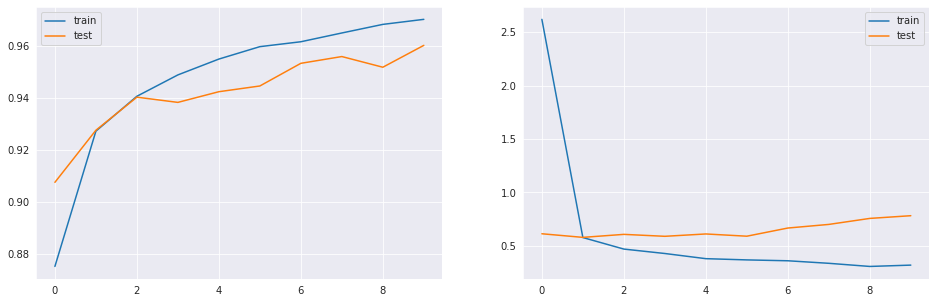

In [16]:
model_seq = create_sequential_model()
model_seq.summary()
history_seq = model_seq.fit(train_data , train_label , epochs = 10 , validation_data = (test_data , test_label))
plot_his(history_seq)

Create model using **Functional API**

In [18]:
def create_functionalapi_model():
  input_layer = Input(shape=(28,28))

  #1st way -> i. flatten_layer = Flatten() ii. flatten_layer(input_layer)
  #2nd way -> i. flatten_layer = Flatten()(input_layer)
  flatten_layer = Flatten()(input_layer)

  #1st way -> i. first_layer = Dense(128 , activation=tf.nn.relu) ii. first_layer(flatten_layer)
  #2nd way -> i. first_layer = Dense(128 , activation=tf.nn.relu)(flatten_layer)
  first_layer = Dense(128 , activation=tf.nn.relu)(flatten_layer)

  output_layer = Dense(10 , activation=tf.nn.softmax)(first_layer)
  model = Model(inputs = input_layer , outputs = output_layer)
  model.compile(optimizer = "rmsprop" , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])
  return model

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.8801 - acc: 0.8732 - val_loss: 0.6558 - val_acc: 0.9029
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5692 - acc: 0.9278 - val_loss: 0.6

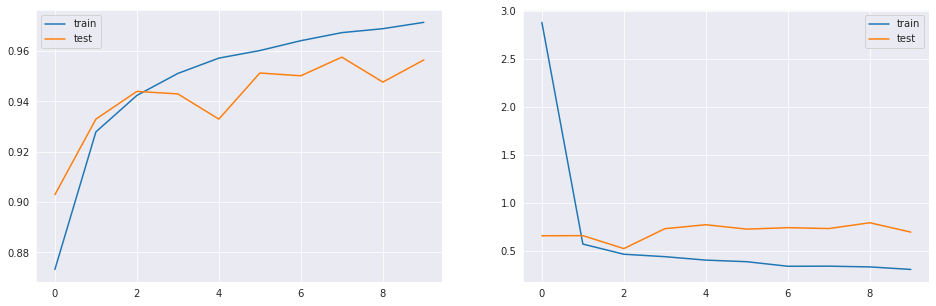

In [19]:
model_func = create_functionalapi_model()
model_func.summary()
history_func = model_func.fit(train_data , train_label , epochs = 10 , validation_data = (test_data , test_label))
plot_his(history_func)